## Introduction 

The datasets, Germany E-charging stations and E-Ladesäulenregister, when combined provide information about electric vehicle charging stations in Germany and offer valuable insights into the availability, characteristics, and usage patterns of charging infrastructure across the country.


Germany E-charging stations:

Data URL: https://opendata.rhein-kreis-neuss.de/api/v2/catalog/datasets/rhein-kreis-neuss-ladesaulen-in-deutschland/exports/csv
This dataset represents the charging station map of the Federal Network Agency. It includes essential details about each charging station, such as the operator, type of charging facility, number of charging points, power capacity, plug types, location information (address, postal code, city), installation date, and coordinates.

E-Ladesäulenregister:

Data URL: https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Sachgebiete/Energie/Unternehmen_Institutionen/E_Mobilitaet/
Ladesaeulenregister.xlsx?__blob=publicationFile&v=21
This dataset represents the charging facilities registered with the Federal Network Agency. It includes information about the charging station operator, address details (street, house number, postal code, city), federal state, administrative region, latitude, longitude, installation date, power capacity, charging facility type, number of charging points, plug types, and public keys.

## Methodology 

Questions that interests us:

1. Regions with the highest number of charging stations

2. Top 10 cities with the highest number of charging stations

3. Distribution of charging station types

4. Average power capacity of charging stations

5. Average power capacity of charging stations by region

6. Number of charging stations per operator

In order to answer these questions following steps were followed:

#### Data collection:
    The first step was to gather the necessary datasets for analysis. The two datasets, Germany E-charging stations and E-Ladesäulenregister, were obtained from their respective sources. The data was available in different formats, including CSV and XLSX.

#### Data Preprocessing: 
    Before proceeding with analysis, data was preprocessed and cleaned by steps such as handling missing values, removing duplicates and unnecessary rows, standardizing column names, and encoding for German characters. 

#### Data Integration: 
    The datasets were combined based on common fields or identifiers to create a unified dataset. This integration allowed for a comprehensive analysis of the combined data, leveraging the information from both datasets simultaneously.

#### Exploratory Data Analysis (EDA): 
    Combined Datset was further explored to gain insights into the charging station landscape in Germany. it involved analyzing the data distribution, identifing patterns, and uncovering of meaningful trends.

#### Data Visualization: 
    The findings and results were visually represented using appropriate graphs, charts, and plots. To effectively communicate the insights derived from the analysis and for better understanding of results.

#### Interpretation and Conclusion: 
    The results and findings from the analysis were interpreted and summarized.

## Install dependencies
    
    Initially, install all required dependencies.

In [8]:
%pip install pandas
%pip install numpy
%pip install openpyxl
%pip install sqlalchemy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Data Description

### Load data
    
    Create a pandas dataframe using the local sqlite file.

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasource1: Germany E-charging stations (CSV)
charging_stations_data = pd.read_sql_table('e_charging_stations', 'sqlite:///AMSE_database.sqlite')
# Load Datasource2: E-Ladesäulenregister (XLSX)
charging_register_data = pd.read_sql_table('e_ladesäulenregister', 'sqlite:///AMSE_database.sqlite')


### Initial rows of datasets
    
    Datasource 1 : Germany E-charging stations (CSV)

In [13]:
charging_stations_data.head(10)

,betreiber,art_der_ladeeinrichung,anzahl_ladepunkte,anschlussleistung,steckertypen1,steckertypen2,steckertypen3,steckertypen4,p1_kw,p2_kw,p3_kw,p4_kw,kreis_kreisfreie_stadt,ort,postleitzahl,strasse,hausnummer,adresszusatz,inbetriebnahmedatum,koordinaten
0,Stadtwerke Iserlohn GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,0,0,22.0,22.0,0.0,0.0,Kreis Märkischer Kreis,Iserlohn,58640,Waldweg,19,0,2021-12-01,"51.401975, 7.7112"
1,Stadtwerke Iserlohn GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,0,0,22.0,22.0,0.0,0.0,Kreis Märkischer Kreis,Iserlohn,58640,Gertrudisstraße,10,0,2021-12-01,"51.419584, 7.712047"
2,Stadtwerke Iserlohn GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,0,0,22.0,22.0,0.0,0.0,Kreis Märkischer Kreis,Iserlohn,58640,Schneebruch,9,0,2021-12-01,"51.426332, 7.716913"
3,Stadtwerke Iserlohn GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,0,0,22.0,22.0,0.0,0.0,Kreis Märkischer Kreis,Iserlohn,58642,Hagener Straße,134,0,2021-12-01,"51.364356, 7.59831"
4,Stadtwerke Iserlohn GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,0,0,22.0,22.0,0.0,0.0,Kreis Märkischer Kreis,Iserlohn,58642,Am Dorfplatz,6,0,2021-12-01,"51.37886, 7.60512"
5,Stadtwerke Iserlohn GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,0,0,22.0,22.0,0.0,0.0,Kreis Märkischer Kreis,Iserlohn,58642,Berliner Allee,88,0,2021-12-01,"51.372311, 7.627318"
6,Stadtwerke Iserlohn GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,0,0,22.0,22.0,0.0,0.0,Kreis Märkischer Kreis,Iserlohn,58642,Bahnhofstr.,3,0,2022-02-18,"51.363675, 7.618361"
7,Stadtwerke Iserlohn GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,0,0,22.0,22.0,0.0,0.0,Kreis Märkischer Kreis,Iserlohn,58644,Insterburger Weg,10,0,2021-12-01,"51.361765, 7.641314"
8,Stadtwerke Iserlohn GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,0,0,22.0,22.0,0.0,0.0,Kreis Märkischer Kreis,Iserlohn,58644,Am Buschwald,16,0,2021-12-01,"51.371774, 7.645107"
9,Stadtwerke Iserlohn GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,0,0,22.0,22.0,0.0,0.0,Kreis Märkischer Kreis,Iserlohn,58644,Untergrüner Straße,134,0,2021-12-02,"51.367265, 7.656551"



    Datasource 2 : E-Ladesäulenregister (XLSX)

In [14]:
charging_register_data.head(10)

,betreiber,strasse,hausnummer,adresszusatz,postleitzahl,ort,bundesland,kreis_kreisfreie_stadt,breitengrad,längengrad,...,public_key1,steckertypen2,p2_[kw],public_key2,steckertypen3,p3_[kw],public_key3,steckertypen4,p4_[kw],public_key4
0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,0,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.442398,9.659075,...,0,AC Steckdose Typ 2,22,0,0,0.0,0,0,0,0
1,smopi®,Albstraße,14,0,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.449353,9.672201,...,0,AC Steckdose Typ 2,22,0,AC Steckdose Typ 2,22.0,0,AC Steckdose Typ 2,22,0
2,Albwerk GmbH & Co. KG,Parkplatz Campingplatz,0,0,72589,Westerheim,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.5105,9.609,...,0,AC Steckdose Typ 2,22,0,0,0.0,0,0,0,0
3,EnBW mobility+ AG und Co.KG,Hauptstraße,91c,0,73340,Amstetten,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.5785342,9.8748399,...,0,"DC Kupplung Combo, DC CHAdeMO",50,0,0,0.0,0,0,0,0
4,SWU Energie GmbH,Sterngasse,6,0,88481,Balzheim,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.179959,10.076977,...,0,0,0,0,0,0.0,0,0,0,0
5,SWU Energie GmbH,Herwigstraße,21,0,89129,Langenau,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.48524,10.028291,...,0,0,0,0,0,0.0,0,0,0,0
6,EnBW mobility+ AG und Co.KG,Flurstück,313,0,89129,Langenau/Seligweiler,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.456817,10.029649,...,0,DC Kupplung Combo,300,0,0,0.0,0,0,0,0
7,EnBW mobility+ AG und Co.KG,Flurstück,313,0,89129,Langenau/Seligweiler,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.456817,10.029649,...,0,DC Kupplung Combo,300,0,0,0.0,0,0,0,0
8,EnBW mobility+ AG und Co.KG,Flurstück,313,0,89129,Langenau/Seligweiler,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.456817,10.029649,...,0,AC Steckdose Typ 2,22,0,0,0.0,0,0,0,0
9,EnBW mobility+ AG und Co.KG,Flurstück,313,0,89129,Langenau/Seligweiler,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.456817,10.029649,...,0,AC Steckdose Typ 2,22,0,0,0.0,0,0,0,0


### Checking dimenesions of datasets: 

In [15]:
# Check the dimensions of the dataset 1
print ("Dataset 1:")
print(charging_stations_data.shape)

# Check the dimensions of the dataset 2
print ("\nDataset 2:")
print(charging_register_data.shape)

Dataset 1:
(36770, 20)

Dataset 2:
(44227, 26)


### Information regarding datasources:

In [16]:
print("Basic info : DataSet 1\n")
charging_stations_data.info()

print("\nBasic info : DataSet 2\n")
charging_register_data.info()

Basic info : DataSet 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36770 entries, 0 to 36769
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   betreiber               36770 non-null  object 
 1   art_der_ladeeinrichung  36770 non-null  object 
 2   anzahl_ladepunkte       36770 non-null  int64  
 3   anschlussleistung       36770 non-null  float64
 4   steckertypen1           36770 non-null  object 
 5   steckertypen2           36770 non-null  object 
 6   steckertypen3           36770 non-null  object 
 7   steckertypen4           36770 non-null  object 
 8   p1_kw                   36770 non-null  float64
 9   p2_kw                   36770 non-null  float64
 10  p3_kw                   36770 non-null  float64
 11  p4_kw                   36770 non-null  float64
 12  kreis_kreisfreie_stadt  36770 non-null  object 
 13  ort                     36770 non-null  object 
 14  postleitzahl  

## Results, Findings and Interpretation

### Data integration :
        
        Merging of two datasets using pd.concat
        
        In our findings, the focus is on the top 10 or 20 values, as this ensures that the graph remains manageable.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the datasets based on relevant columns
merged_data = pd.concat([charging_stations_data, charging_register_data])

1. Regions with the highest number of charging station

    To determine this the combined dataset was analyzed to identify the unique regions present.

    Column used for this is "kreis_kreisfreie_stadt".

    The count of charging stations was calculated for each region based on this regions with the highest number of charging stations were determined. 

    Providing insights into the geographical distribution of charging infrastructure in Germany.

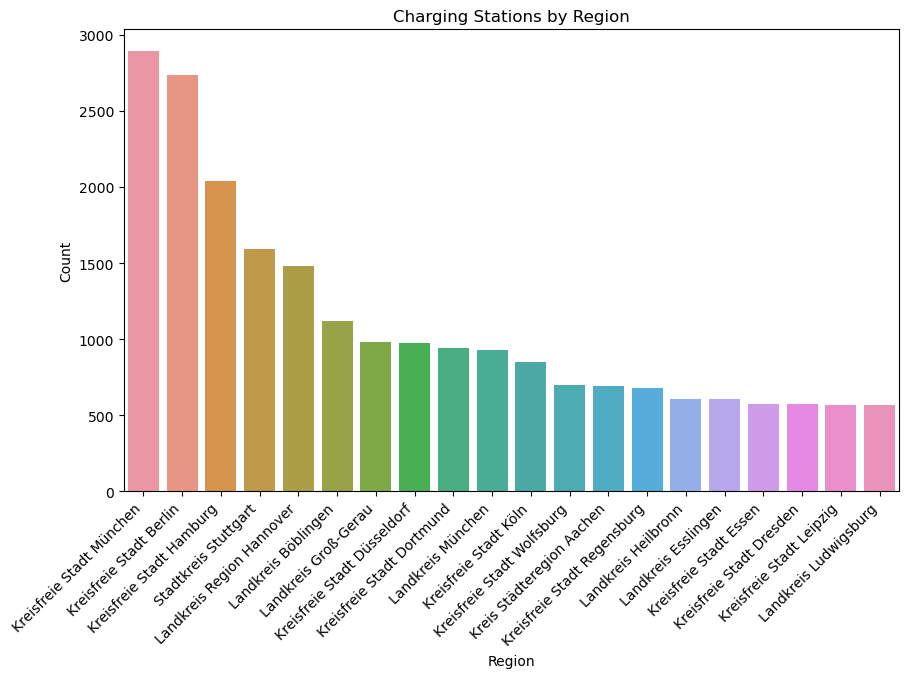

In [18]:


# Question 1: Regions with the highest number of charging stations
region_counts = merged_data['kreis_kreisfreie_stadt'].value_counts().nlargest(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Charging Stations by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

2. Top 10 cities with the highest number of charging stations

    For this, the combined dataset was analyzed to identify the unique cities present and then the count of charging stations was calculated for each city.
    
    The top 10 cities with the highest number of charging stations were determined based on these counts.

    Column used for this is "ort"

    Highlighting the urban areas with the most developed charging infrastructure.

Index(['München', 'Berlin', 'Hamburg', 'Stuttgart', 'Hannover', 'Düsseldorf',
       'Dortmund', 'Rüsselsheim am Main', 'Köln', 'Wolfsburg'],
      dtype='object')


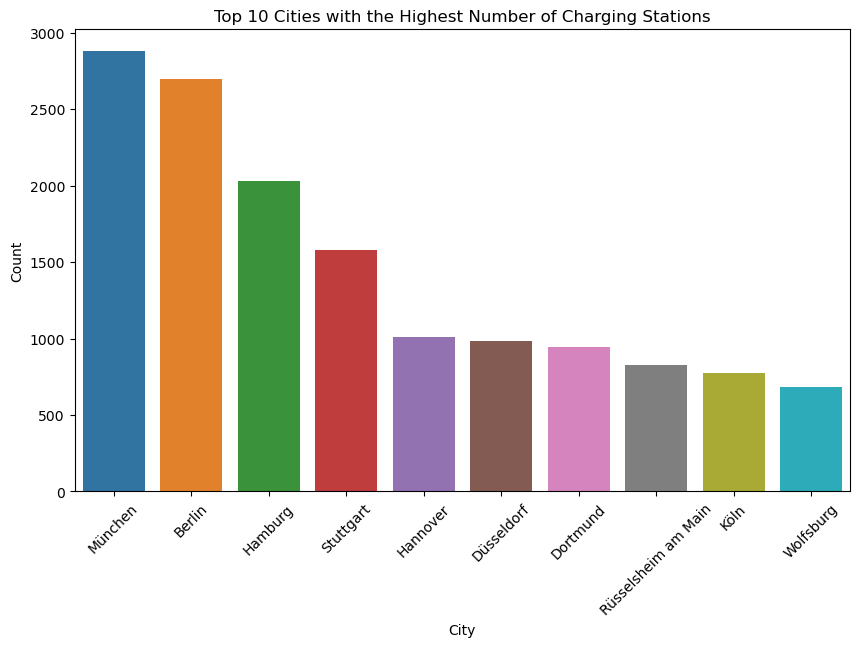

In [19]:
# Question 2: Top 10 cities with the highest number of charging stations
top_cities = merged_data['ort'].value_counts().nlargest(10)
print(top_cities.index)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities with the Highest Number of Charging Stations')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

3. Average power capacity of charging stations

    The power capacity column that is "anschlussleistung" in the dataset was extracted.

    Data cleaning or preprocessing was performed on the power capacity values by using replace and astype function.
    
    The average power capacity of all charging stations was calculated by using mean().

    Indicating the typical charging capabilities available across the dataset.

In [20]:

# Question 3: Average power capacity of charging stations
merged_data['anschlussleistung'] = merged_data['anschlussleistung'].replace(' kW', '').replace(',', '.').astype(float).nlargest(20)
average_power_capacity = merged_data['anschlussleistung'].mean()
print("Average Power Capacity of Charging Stations (kW):", average_power_capacity)

Average Power Capacity of Charging Stations (kW): 787.0


4. Average power capacity of charging stations by region

    The dataset was first grouped by column name 'kreis_kreisfreie_stadt'(region) and then average power capacity (column name for this : 'anschlussleistung' ) of charging stations within each region was calculated.

    Revealing regional variations in charging infrastructure capabilities.

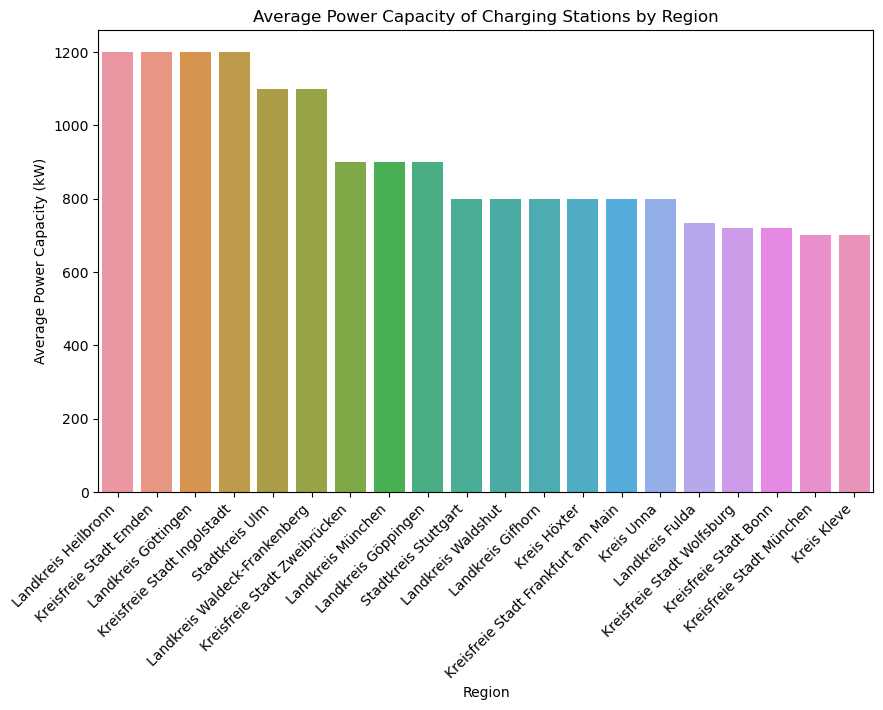

In [21]:
# Question 4: Average power capacity of charging stations by region
region_avg_power_capacity = merged_data.groupby('kreis_kreisfreie_stadt')['anschlussleistung'].mean().sort_values(ascending=False).nlargest(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_avg_power_capacity.index, y=region_avg_power_capacity.values)
plt.title('Average Power Capacity of Charging Stations by Region')
plt.xlabel('Region')
plt.ylabel('Average Power Capacity (kW)')
plt.xticks(rotation=45, ha="right")
plt.show()

5. Distribution of charging station types

    The "art_der_ladeeinrichung" (charging station type) column from both datasets was analyzed.

    Unique types of charging stations were identified and count of each charging station type was calculated to determine the distribution.

    It helps understand the variety of charging options available. Providing insights into the charging technology landscape in Germany.

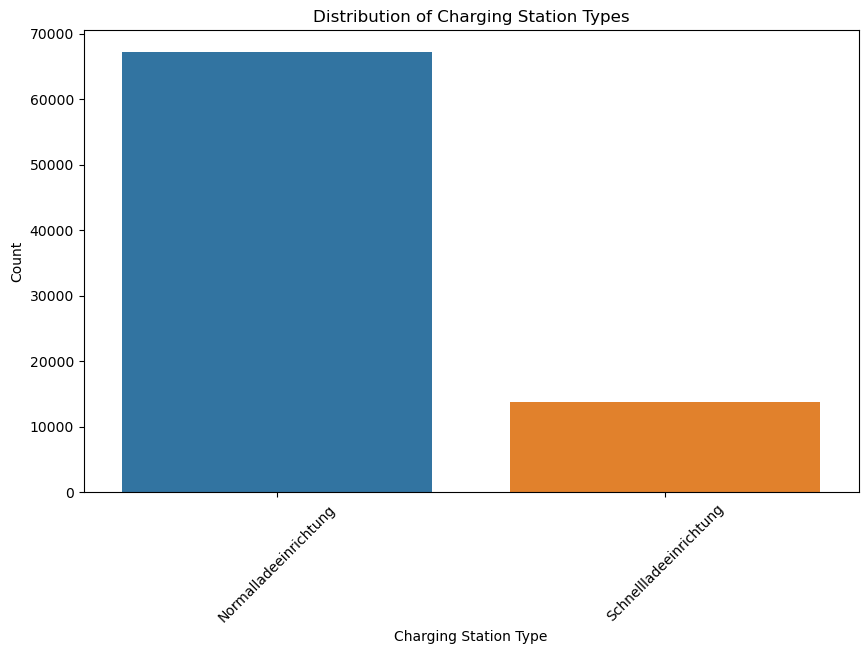

In [22]:

# Question 5: Distribution of charging station types
station_type_counts = merged_data['art_der_ladeeinrichung'].value_counts().nlargest(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=station_type_counts.index, y=station_type_counts.values)
plt.title('Distribution of Charging Station Types')
plt.xlabel('Charging Station Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

6. Number of charging stations per operator

    The number of charging stations was calculated for each operator usin column "betreiber", giving an overview of the market share and presence of different operators in the charging network.

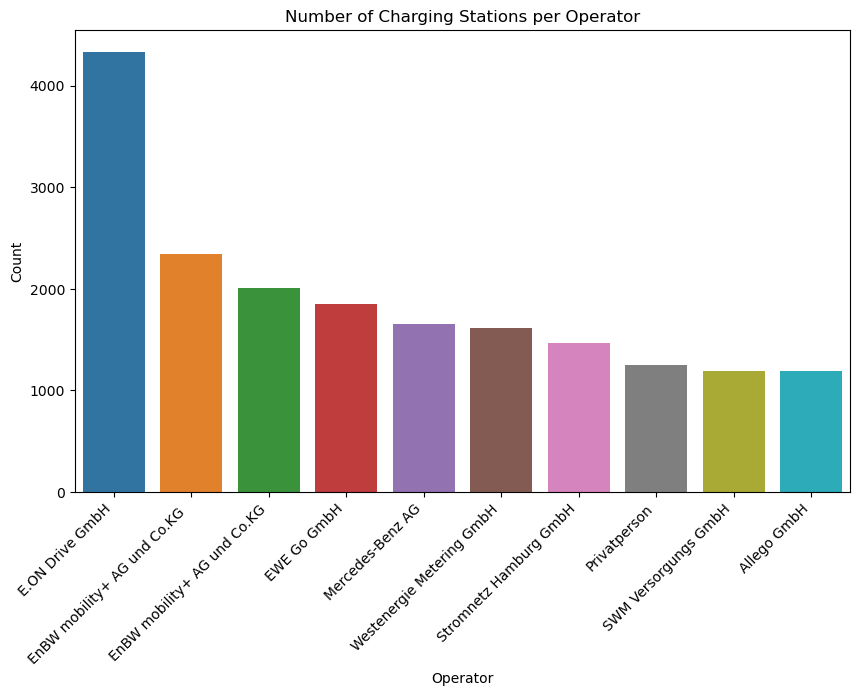

In [23]:

# Question 6: Number of charging stations per operator
operator_counts = merged_data['betreiber'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=operator_counts.index, y=operator_counts.values)
plt.title('Number of Charging Stations per Operator')
plt.xlabel('Operator')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.show()

## Conclusion


In conclusion, the analysis of the Germany E-charging stations and E-Ladesäulenregister datasets provided valuable insights into the charging infrastructure landscape in Germany.

 The regions with the highest number of charging stations were identified, indicating the areas with the most developed charging network. The top 10 cities with the highest number of charging stations were identified, emphasizing the urban areas with the most extensive charging infrastructure. 
 
 The average power capacity of charging stations was determined, highlighting the typical charging capabilities available.The analysis of average power capacity by region revealed regional variations in charging infrastructure capabilities.
 
 The distribution of charging station types showcased the variety of charging options in the country. Lastly, the number of charging stations per operator shed light on the market share and presence of different operators in the charging network. 
 
 Overall, these findings contribute to a better understanding of the current state of e-charging infrastructure in Germany and can guide policymakers, businesses, and individuals in the further development and utilization of electric vehicles.